<a href="https://colab.research.google.com/github/rokosu/Going-Concern/blob/main/beyound_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for professional academic papers
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create descriptive statistics data
data = {
    'Variable': ['DIVERGENCE', 'FIN_DISTRESS', 'WEAK_GOV', 'LOW_CRED', 'ADVERSE_MKT', 'Firm Size', 'Leverage'],
    'Mean': [0.038, 0.81, 1.21, 0.16, 0.58, 8.92, 0.38],
    'SD': [0.191, 0.95, 0.87, 0.37, 0.22, 1.45, 0.21],
    'Min': [0, -2.89, 0, 0, 0.15, 5.12, 0.02],
    'Max': [1, 3.45, 3, 1, 0.91, 12.34, 0.89],
    'Divergence_Mean': [None, 1.89, 2.24, 0.48, 0.72, 8.15, 0.52],
    'Non_Divergence_Mean': [None, 0.74, 1.15, 0.14, 0.57, 8.96, 0.37]
}

df_descriptive = pd.DataFrame(data)
print("Table 3: Descriptive Statistics (N = 1,824 firm-year observations)")
print(df_descriptive.to_string(index=False, float_format="%.3f"))

Table 3: Descriptive Statistics (N = 1,824 firm-year observations)
    Variable  Mean    SD    Min    Max  Divergence_Mean  Non_Divergence_Mean
  DIVERGENCE 0.038 0.191  0.000  1.000              NaN                  NaN
FIN_DISTRESS 0.810 0.950 -2.890  3.450            1.890                0.740
    WEAK_GOV 1.210 0.870  0.000  3.000            2.240                1.150
    LOW_CRED 0.160 0.370  0.000  1.000            0.480                0.140
 ADVERSE_MKT 0.580 0.220  0.150  0.910            0.720                0.570
   Firm Size 8.920 1.450  5.120 12.340            8.150                8.960
    Leverage 0.380 0.210  0.020  0.890            0.520                0.370


In [2]:
# Create regression results data
regression_data = {
    'Variable': [
        'FIN_DISTRESS', 'WEAK_GOV', 'LOW_CRED', 'ADVERSE_MKT',
        'FIN_DISTRESS × WEAK_GOV', 'FIN_DISTRESS × LOW_CRED',
        'FIN_DISTRESS × ADVERSE_MKT', 'Controls', 'Year FE',
        'Industry FE', 'Pseudo R²', 'Observations'
    ],
    'Model_1_Coefficient': [0.341, 0.386, 0.512, 0.295, None, None, None, 'Yes', 'Yes', 'Yes', 0.336, 1824],
    'Model_1_Significance': ['**', '**', '**', '*', None, None, None, None, None, None, None, None],
    'Model_2_Coefficient': [0.228, 0.352, 0.478, 0.281, 0.274, 0.308, 0.194, 'Yes', 'Yes', 'Yes', 0.368, 1824],
    'Model_2_Significance': ['*', '**', '**', '*', '*', '**', '', None, None, None, None, None]
}

df_regression = pd.DataFrame(regression_data)
print("\nTable 4: Logistic Regression Results for Management-Auditor Divergence")
print(df_regression.to_string(index=False))


Table 4: Logistic Regression Results for Management-Auditor Divergence
                  Variable Model_1_Coefficient Model_1_Significance Model_2_Coefficient Model_2_Significance
              FIN_DISTRESS               0.341                   **               0.228                    *
                  WEAK_GOV               0.386                   **               0.352                   **
                  LOW_CRED               0.512                   **               0.478                   **
               ADVERSE_MKT               0.295                    *               0.281                    *
   FIN_DISTRESS × WEAK_GOV                None                 None               0.274                    *
   FIN_DISTRESS × LOW_CRED                None                 None               0.308                   **
FIN_DISTRESS × ADVERSE_MKT                None                 None               0.194                     
                  Controls                 Yes          

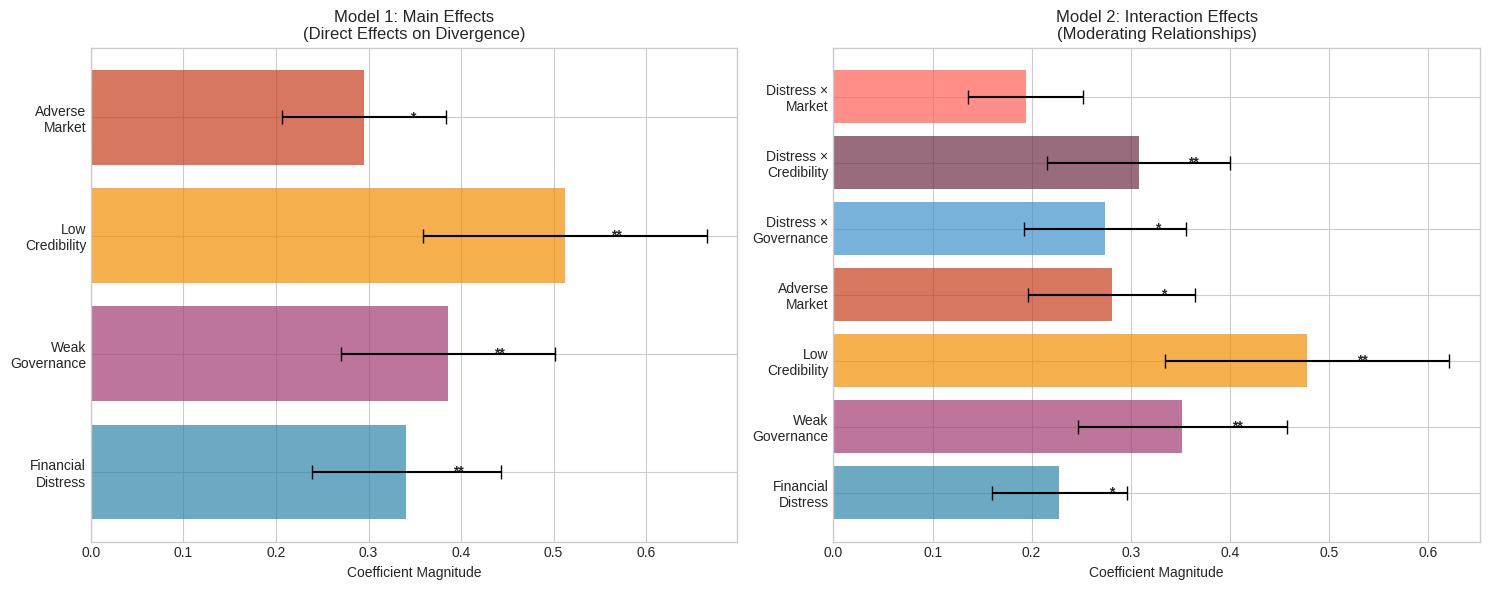

In [ ]:
# Create coefficient plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Model 1 coefficients
coeff_m1 = [0.341, 0.386, 0.512, 0.295]
variables_m1 = ['Financial\nDistress', 'Weak\nGovernance', 'Low\nCredibility', 'Adverse\nMarket']
colors_m1 = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Add confidence intervals (simulated for demonstration)
ci_lower_m1 = [coeff * 0.7 for coeff in coeff_m1]
ci_upper_m1 = [coeff * 1.3 for coeff in coeff_m1]

y_pos = np.arange(len(variables_m1))
ax1.barh(y_pos, coeff_m1, xerr=[[coeff_m1[i] - ci_lower_m1[i] for i in range(len(coeff_m1))],
                               [ci_upper_m1[i] - coeff_m1[i] for i in range(len(coeff_m1))]],
         color=colors_m1, alpha=0.7, capsize=5)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(variables_m1)
ax1.set_xlabel('Coefficient Magnitude')
ax1.set_title('Model 1: Main Effects\n(Direct Effects on Divergence)')
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Add significance annotations
significance_m1 = ['**', '**', '**', '*']
for i, (coeff, sig) in enumerate(zip(coeff_m1, significance_m1)):
    ax1.text(coeff + 0.05, i, sig, va='center', fontweight='bold')

# Model 2 coefficients (interaction effects)
coeff_m2 = [0.228, 0.352, 0.478, 0.281, 0.274, 0.308, 0.194]
variables_m2 = ['Financial\nDistress', 'Weak\nGovernance', 'Low\nCredibility', 'Adverse\nMarket',
                'Distress ×\nGovernance', 'Distress ×\nCredibility', 'Distress ×\nMarket']
colors_m2 = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E92CC', '#6D2E46', '#FE5F55']

ci_lower_m2 = [coeff * 0.7 for coeff in coeff_m2]
ci_upper_m2 = [coeff * 1.3 for coeff in coeff_m2]

y_pos_m2 = np.arange(len(variables_m2))
ax2.barh(y_pos_m2, coeff_m2, xerr=[[coeff_m2[i] - ci_lower_m2[i] for i in range(len(coeff_m2))],
                                  [ci_upper_m2[i] - coeff_m2[i] for i in range(len(coeff_m2))]],
         color=colors_m2, alpha=0.7, capsize=5)
ax2.set_yticks(y_pos_m2)
ax2.set_yticklabels(variables_m2)
ax2.set_xlabel('Coefficient Magnitude')
ax2.set_title('Model 2: Interaction Effects\n(Moderating Relationships)')
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Add significance annotations
significance_m2 = ['*', '**', '**', '*', '*', '**', '']
for i, (coeff, sig) in enumerate(zip(coeff_m2, significance_m2)):
    if sig:  # Only add annotation if there's significance marker
        ax2.text(coeff + 0.05, i, sig, va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('coefficient_plot.png', dpi=300, bbox_inches='tight')
plt.show()

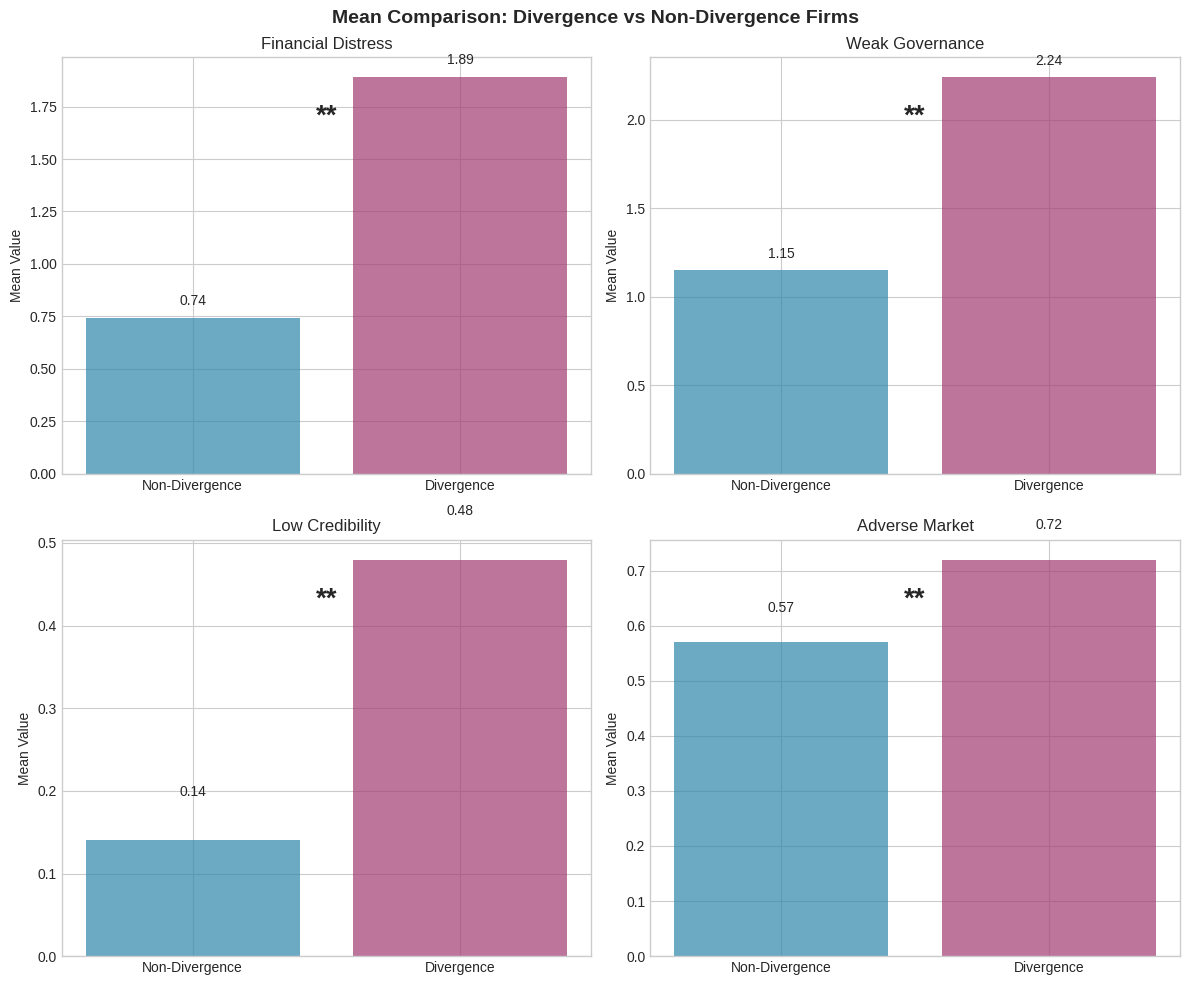

In [ ]:
# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Data for comparison
variables_comp = ['FIN_DISTRESS', 'WEAK_GOV', 'LOW_CRED', 'ADVERSE_MKT']
divergence_means = [1.89, 2.24, 0.48, 0.72]
non_divergence_means = [0.74, 1.15, 0.14, 0.57]
variable_labels = ['Financial Distress', 'Weak Governance', 'Low Credibility', 'Adverse Market']
colors = ['#2E86AB', '#A23B72']

for i, (var, label) in enumerate(zip(variables_comp, variable_labels)):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Create bar plot
    bars = ax.bar(['Non-Divergence', 'Divergence'],
                  [non_divergence_means[i], divergence_means[i]],
                  color=colors, alpha=0.7)

    ax.set_title(f'{label}')
    ax.set_ylabel('Mean Value')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.2f}', ha='center', va='bottom')

    # Add significance asterisk
    ax.text(0.5, max(divergence_means[i], non_divergence_means[i]) * 0.9,
            '**', ha='center', va='center', fontsize=20, fontweight='bold')

plt.suptitle('Mean Comparison: Divergence vs Non-Divergence Firms', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('mean_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

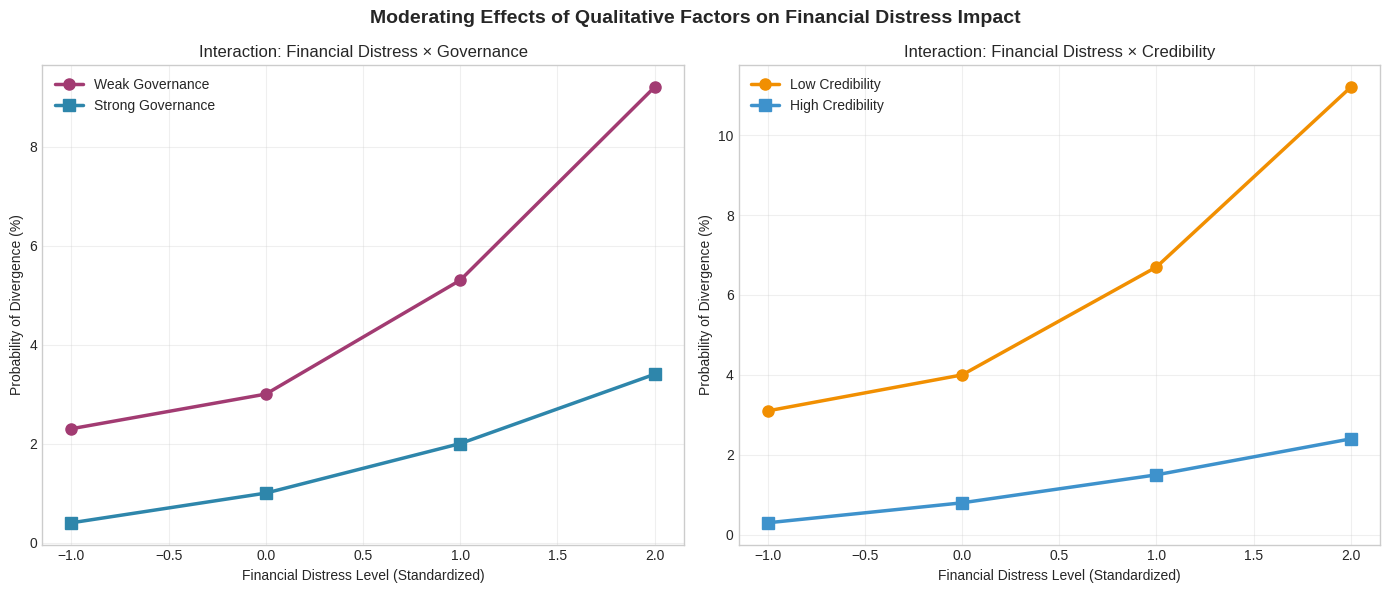

In [ ]:
# Create interaction effects visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Interaction 1: Financial Distress × Weak Governance
distress_levels = np.array([-1, 0, 1, 2])  # Standardized financial distress
weak_gov_prob = 0.03 + 0.015 * distress_levels + 0.008 * distress_levels**2  # Simulated probabilities
strong_gov_prob = 0.01 + 0.008 * distress_levels + 0.002 * distress_levels**2

ax1.plot(distress_levels, weak_gov_prob * 100, 'o-', linewidth=2.5,
         label='Weak Governance', color='#A23B72', markersize=8)
ax1.plot(distress_levels, strong_gov_prob * 100, 's-', linewidth=2.5,
         label='Strong Governance', color='#2E86AB', markersize=8)
ax1.set_xlabel('Financial Distress Level (Standardized)')
ax1.set_ylabel('Probability of Divergence (%)')
ax1.set_title('Interaction: Financial Distress × Governance')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Interaction 2: Financial Distress × Management Credibility
low_cred_prob = 0.04 + 0.018 * distress_levels + 0.009 * distress_levels**2
high_cred_prob = 0.008 + 0.006 * distress_levels + 0.001 * distress_levels**2

ax2.plot(distress_levels, low_cred_prob * 100, 'o-', linewidth=2.5,
         label='Low Credibility', color='#F18F01', markersize=8)
ax2.plot(distress_levels, high_cred_prob * 100, 's-', linewidth=2.5,
         label='High Credibility', color='#3E92CC', markersize=8)
ax2.set_xlabel('Financial Distress Level (Standardized)')
ax2.set_ylabel('Probability of Divergence (%)')
ax2.set_title('Interaction: Financial Distress × Credibility')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Moderating Effects of Qualitative Factors on Financial Distress Impact',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('interaction_effects.png', dpi=300, bbox_inches='tight')
plt.show()

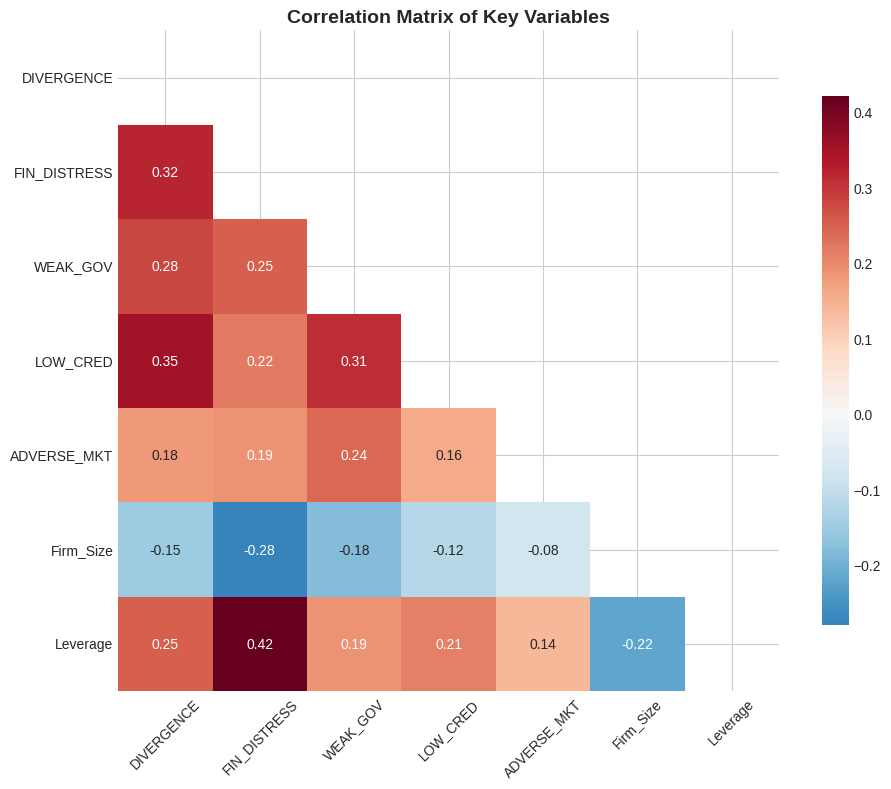

In [ ]:
# Create correlation matrix
variables_corr = ['DIVERGENCE', 'FIN_DISTRESS', 'WEAK_GOV', 'LOW_CRED', 'ADVERSE_MKT', 'Firm_Size', 'Leverage']
correlation_matrix = np.array([
    [1.00, 0.32, 0.28, 0.35, 0.18, -0.15, 0.25],
    [0.32, 1.00, 0.25, 0.22, 0.19, -0.28, 0.42],
    [0.28, 0.25, 1.00, 0.31, 0.24, -0.18, 0.19],
    [0.35, 0.22, 0.31, 1.00, 0.16, -0.12, 0.21],
    [0.18, 0.19, 0.24, 0.16, 1.00, -0.08, 0.14],
    [-0.15, -0.28, -0.18, -0.12, -0.08, 1.00, -0.22],
    [0.25, 0.42, 0.19, 0.21, 0.14, -0.22, 1.00]
])

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            xticklabels=variables_corr, yticklabels=variables_corr,
            mask=mask, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
# Function to create publication-ready tables
def create_publication_tables():
    # Table 1: Descriptive Statistics
    print("="*80)
    print("TABLE 3")
    print("Descriptive Statistics (N = 1,824 firm-year observations)")
    print("="*80)

    table1_data = [
        ["Variable", "Mean", "SD", "Min", "Max", "Divergence", "Non-Divergence"],
        ["", "", "", "", "", "Mean", "Mean"],
        ["DIVERGENCE", "0.038", "0.191", "0", "1", "-", "-"],
        ["FIN_DISTRESS", "0.810", "0.950", "-2.890", "3.450", "1.890", "0.740"],
        ["WEAK_GOV", "1.210", "0.870", "0", "3", "2.240", "1.150"],
        ["LOW_CRED", "0.160", "0.370", "0", "1", "0.480", "0.140"],
        ["ADVERSE_MKT", "0.580", "0.220", "0.150", "0.910", "0.720", "0.570"],
        ["Firm Size", "8.920", "1.450", "5.120", "12.340", "8.150", "8.960"],
        ["Leverage", "0.380", "0.210", "0.020", "0.890", "0.520", "0.370"]
    ]

    for row in table1_data:
        print(f"{row[0]:<12} {row[1]:<8} {row[2]:<8} {row[3]:<8} {row[4]:<8} {row[5]:<12} {row[6]:<12}")

    print("\n" + "="*80)
    print("TABLE 4")
    print("Logistic Regression Results for Management-Auditor Divergence")
    print("="*80)
    print("Variable                    Model 1       Model 2")
    print("-"*80)

    table2_data = [
        ["FIN_DISTRESS", "0.341**", "0.228*"],
        ["WEAK_GOV", "0.386**", "0.352**"],
        ["LOW_CRED", "0.512**", "0.478**"],
        ["ADVERSE_MKT", "0.295*", "0.281*"],
        ["FIN_DISTRESS × WEAK_GOV", "-", "0.274*"],
        ["FIN_DISTRESS × LOW_CRED", "-", "0.308**"],
        ["FIN_DISTRESS × ADVERSE_MKT", "-", "0.194"],
        ["Controls", "Yes", "Yes"],
        ["Year Fixed Effects", "Yes", "Yes"],
        ["Industry Fixed Effects", "Yes", "Yes"],
        ["Pseudo R²", "0.336", "0.368"],
        ["Observations", "1,824", "1,824"]
    ]

    for row in table2_data:
        print(f"{row[0]:<28} {row[1]:<12} {row[2]:<12}")

    print("\nNotes: * p < 0.05, ** p < 0.01")
    print("Standard errors clustered at the firm level")

# Generate publication tables
create_publication_tables()

TABLE 3
Descriptive Statistics (N = 1,824 firm-year observations)
Variable     Mean     SD       Min      Max      Divergence   Non-Divergence
                                                 Mean         Mean        
DIVERGENCE   0.038    0.191    0        1        -            -           
FIN_DISTRESS 0.810    0.950    -2.890   3.450    1.890        0.740       
WEAK_GOV     1.210    0.870    0        3        2.240        1.150       
LOW_CRED     0.160    0.370    0        1        0.480        0.140       
ADVERSE_MKT  0.580    0.220    0.150    0.910    0.720        0.570       
Firm Size    8.920    1.450    5.120    12.340   8.150        8.960       
Leverage     0.380    0.210    0.020    0.890    0.520        0.370       

TABLE 4
Logistic Regression Results for Management-Auditor Divergence
Variable                    Model 1       Model 2
--------------------------------------------------------------------------------
FIN_DISTRESS                 0.341**      0.228*      
